<a href="https://colab.research.google.com/github/marzhira/Deeplearning_Practice/blob/main/%EB%A9%80%ED%8B%B0%EC%BA%A0_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 10차시 실습. 전통적인 선형회귀 코드

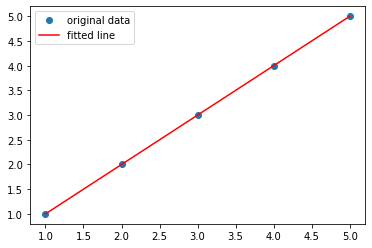

LinregressResult(slope=1.0, intercept=0.0, rvalue=1.0, pvalue=1.2004217548761408e-30, stderr=0.0)


In [1]:
# 이하 코드는 아래의 출처를 참고로 하여 작성하였습니다
# 출처: scipy 공식 문서(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)

# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# 샘플데이터, 결과는 뭘로 예상됩니까?
A = np.array([1,2,3,4,5])
B = np.array([1,2,3,4,5])

#선형회귀 결과
slope, intercept, r_value, p_value, std_err = stats.linregress(A,B)
result = stats.linregress(A,B)

# 시각화
plt.plot(A, B, 'o', label='original data')
plt.plot(A, intercept + slope*A, 'r', label='fitted line')
plt.legend()
plt.show()
print(result)

# 11차시 실습. 머신러닝 코드 및 결과 해석 설명

In [2]:
# 이하 코드는 아래의 출처를 참고로 하여 작성하였습니다
# 출처: 모두를 위한 머신러닝(https://hunkim.github.io/ml/)
# tensorflow 버전이 업데이트 됨에 따라 tensorflow import 부분 수정 진행하였습니다(2020.05.21)

# 기계학습용 라이브러리인 텐서플로를 임포트 합니다.
# 무슨말인지 이해 못하셔도 좋습니다
# for tensorflow 1.x on tensorflow 2.0
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()



# 학습도구 : 예제 데이터
X_data = [1, 2, 3, 4, 5]
Y_data = [1, 2, 3, 4, 5]



# parameter : 기울기(slope)와 Y절편(intercept)
A = tf.Variable(tf.random_normal([1]), name='slope')
B = tf.Variable(tf.random_normal([1]), name='intercept')



# 플레이스 홀더 선언. 지금은 뭔지 몰라도 됩니다
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])



# 어떤 모델 만들겁니까? 네 단순선형회귀니까 1차방정식
model = X * A + B



# 학습을 진행하려면 내가 현재까지 얼마나 틀리고 있는지 알아야 합니다.
# 그 틀린정도를 머신러닝에서는 cost(또는 loss) 라고 부릅니다. 이걸 정해줘야 학습을 하죠?
# 이 아래 의미는 뭘까요?
cost = tf.reduce_mean(tf.square(model - Y))



# 틀린정도를 최소화 하도록 합니다. 경사하강 알고리즘을 사용합니다.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)



# 세션을 키고 초기화합니다. 지금은 이게 뭔지 모르셔도 됩니다
sess = tf.Session()
sess.run(tf.global_variables_initializer())



# 반복문을 돌리기 위해 변수를 선언해 둡니다. 이부분도 여러분들이 지금은 모르셔도 됩니다
run_cost = []
run_weight = []
run_bias = []



# 자. 학습을 시켜 보겠습니다.
# 아래 range(2001) 이라고 되어있는거 보이시죠? 이게 학습 횟수입니다.
# 스스로 최적화 하여 parmeter를 최적화하는걸 보실수 있습니다. 결과가 이해 되시나요?
for step in range(2001):
  run_cost, run_weight, run_bias, f_data = sess.run([cost, A, B, train], feed_dict={X: X_data, Y: Y_data})  
  if step % 200 == 0:
    print('학습횟수:',' ',step,' ','오차(cost):',run_cost,' ','기울기:', run_weight,' ','Y절편:', run_bias)

Instructions for updating:
non-resource variables are not supported in the long term
학습횟수:   0   오차(cost): 22.923315   기울기: [-0.13149686]   Y절편: [0.10671706]
학습횟수:   200   오차(cost): 0.0071990415   기울기: [0.945101]   Y절편: [0.19820283]
학습횟수:   400   오차(cost): 0.0018575785   기울기: [0.9721131]   Y절편: [0.10068061]
학습횟수:   600   오차(cost): 0.0004793115   기울기: [0.98583436]   Y절편: [0.05114245]
학습횟수:   800   오차(cost): 0.0001236774   기울기: [0.99280435]   Y절편: [0.02597872]
학습횟수:   1000   오차(cost): 3.191247e-05   기울기: [0.99634486]   Y절편: [0.01319631]
학습횟수:   1200   오차(cost): 8.234615e-06   기울기: [0.9981433]   Y절편: [0.00670328]
학습횟수:   1400   오차(cost): 2.124874e-06   기울기: [0.9990568]   Y절편: [0.00340509]
학습횟수:   1600   오차(cost): 5.483041e-07   기울기: [0.99952084]   Y절편: [0.00172978]
학습횟수:   1800   오차(cost): 1.4158078e-07   기울기: [0.9997565]   Y절편: [0.00087889]
학습횟수:   2000   오차(cost): 3.6557527e-08   기울기: [0.99987626]   Y절편: [0.00044665]


In [3]:
# 예측을 한번 해봅시다
# 위 예제 데이터의 관계성에 따르면 X가 10일때 예상되는 Y는 얼마입니까?
sess.run(model, feed_dict = {X : [10]})

array([9.999208], dtype=float32)